In [12]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [13]:
train_dir = '/kaggle/input/cat-and-dog/training_set/training_set'
test_dir = '/kaggle/input/cat-and-dog/test_set/test_set'

In [14]:
cat_train = os.path.join(train_dir, 'cats')
dog_train = os.path.join(train_dir, 'dogs')

In [15]:
print(os.listdir(cat_train)[:5])

['cat.3498.jpg', 'cat.891.jpg', 'cat.2842.jpg', 'cat.1.jpg', 'cat.115.jpg']


In [16]:
cat_train_fnames = [os.path.join(cat_train, fname) for fname in (os.listdir(cat_train))]
dog_train_fnames = [os.path.join(dog_train, fname) for fname in (os.listdir(dog_train))]
test_img = mpimg.imread(cat_train_fnames[0])
# plt.imshow(test_img)

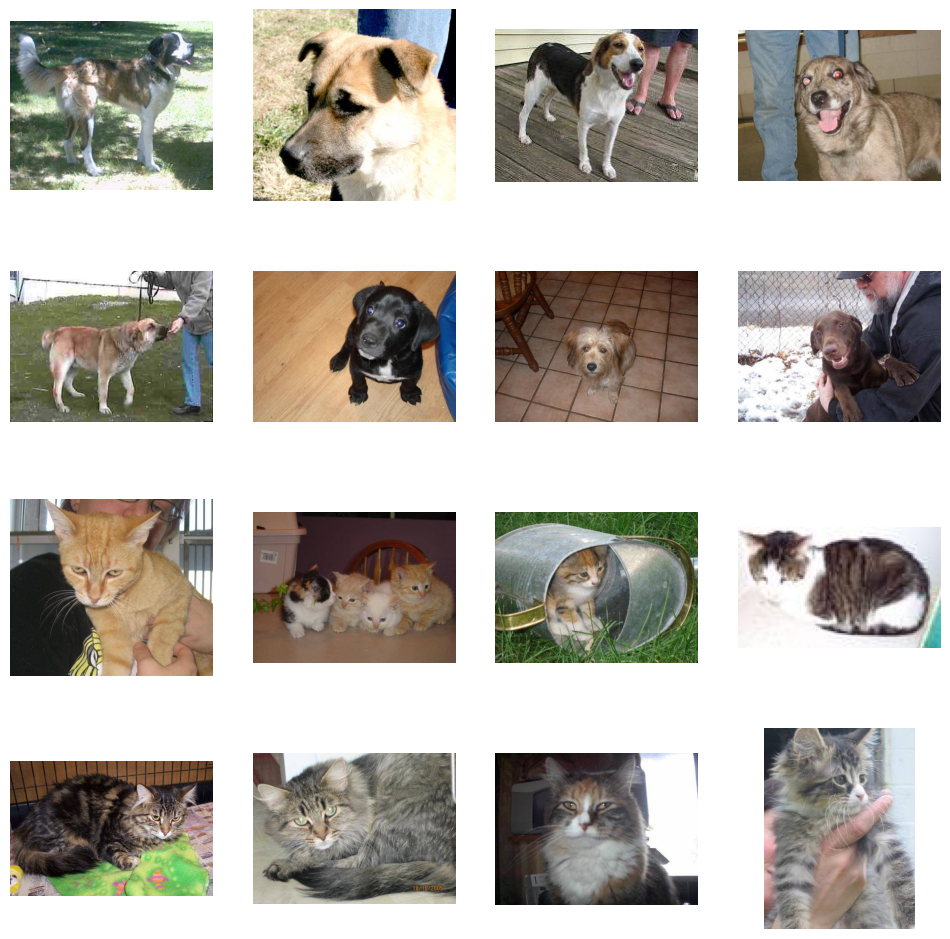

In [17]:
next_dogs = random.sample(dog_train_fnames, 8)
next_cats = random.sample(cat_train_fnames, 8)
plt.figure(figsize=(12,12))
for i, img_path in enumerate(next_dogs + next_cats):
    plt.subplot(4, 4, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis(False)
plt.show()

In [18]:
data_train, data_val = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary',
    validation_split=0.2,
    subset='both',
    seed=123
)

data_test = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(150,150),
    batch_size=32,
    label_mode='binary'
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


In [19]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Rescaling(1.0/255),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
data_aug = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode='nearest'),
    tf.keras.layers.RandomContrast(0.4)
])
AugModel = tf.keras.models.Sequential([
    data_aug,
    model
])

In [20]:
AugModel.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

In [21]:
His = AugModel.fit(data_train, validation_data=data_val, epochs = 10)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.5244 - loss: 6.1418 - val_accuracy: 0.5009 - val_loss: 7.7159
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.6107 - loss: 0.6592 - val_accuracy: 0.5415 - val_loss: 5.8739
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.6237 - loss: 0.6460 - val_accuracy: 0.5771 - val_loss: 3.5932
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.6254 - loss: 0.6409 - val_accuracy: 0.5640 - val_loss: 3.1783
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.6260 - loss: 0.6301 - val_accuracy: 0.5934 - val_loss: 0.9996
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.6252 - loss: 0.6371 - val_accuracy: 0.5603 - val_loss: 0.8011
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.6323 - loss: 0.6414 - val_accuracy: 0.6290 - val_loss: 0.6411
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - accuracy: 0.6404 - loss: 0.6322 - 

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(1, activation='sigmoid') 
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=10
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10


I0000 00:00:1729689847.001285     115 service.cc:145] XLA service 0x79c9c113a700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729689847.001350     115 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729689847.001361     115 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/201 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.5547 - loss: 11.7013 

I0000 00:00:1729689856.804847     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


201/201 ━━━━━━━━━━━━━━━━━━━━ 37s 130ms/step - accuracy: 0.8830 - loss: 3.8576 - val_accuracy: 0.9369 - val_loss: 0.2258
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9635 - loss: 0.1292 - val_accuracy: 0.9438 - val_loss: 0.2089
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9754 - loss: 0.0755 - val_accuracy: 0.9444 - val_loss: 0.2216
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9832 - loss: 0.0474 - val_accuracy: 0.9375 - val_loss: 0.2719
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.9849 - loss: 0.0483 - val_accuracy: 0.9457 - val_loss: 0.2192
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9806 - loss: 0.0676 - val_accuracy: 0.9375 - val_loss: 0.2455
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.9810 - loss: 0.0726 - val_accuracy: 0.9463 - val_loss: 0.2165
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9847 - loss: 0.0614 - val

In [41]:
import numpy as np
def plot_curve(His, epoch, title):
    acc = His.history['accuracy']
    acc_val = His.history['val_accuracy']
    loss = His.history['loss']
    loss_val = His.history['val_loss']
    epochs = epoch
    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    fig.suptitle(title, fontsize=16)
    ax[0].plot(np.arange(epochs), acc, 'b', label='Training acc')
    ax[0].plot(np.arange(epochs), acc_val, 'r', label='Validation acc')
    ax[0].legend()
    ax[1].plot(np.arange(epochs), loss, 'b', label='Training loss')
    ax[1].plot(np.arange(epochs), loss_val, 'r', label='Validation loss')
    ax[1].legend()

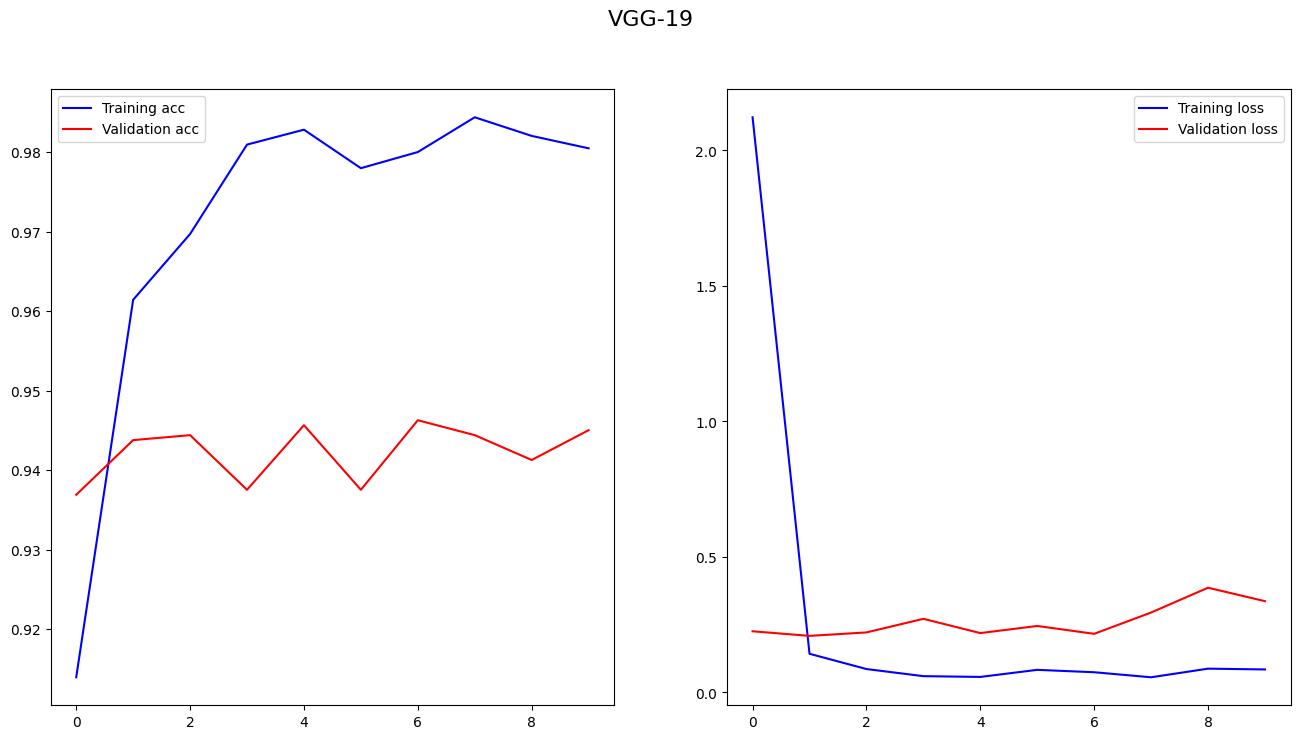

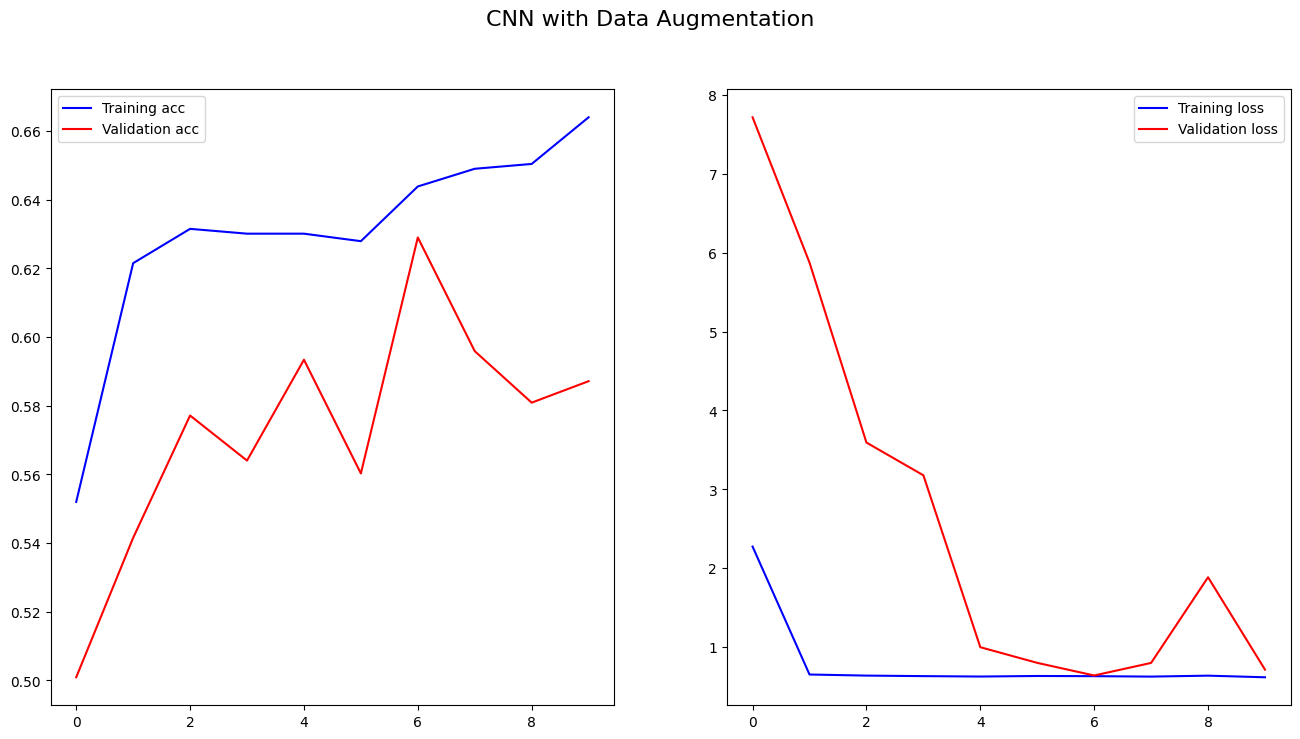

In [42]:
plot_curve(history, 10, 'VGG-19')
plot_curve(His, 10, 'CNN with Data Augmentation')

In [43]:
test_loss, test_accuracy = model.evaluate(data_test)
print(f'Test loss: {test_loss},\nTest accuracy: {test_accuracy}')

64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9565 - loss: 0.2905
Test loss: 0.27039834856987,
Test accuracy: 0.952545702457428
